# 582744 Advanced Course in Machine Learning

## Exercise 6.3: Character classification with MLPs

This exercise contains most of the code needed in a Python jupyter notebook, you will be asked to fill in some important parts.  Just read the text and run each code cell by selecting and clicking the "run cell" button (play-like button), or by pressing shift-Enter.

In this exercise, we'll train a multi-layer perceptron model to classify characters from the [notMNIST dataset](http://yaroslavvb.blogspot.fi/2011/09/notmnist-dataset.html) using [Keras](https://keras.io/). notMNIST contains alphabetic letters written with different fonts (check the link to see some examples).

The notebook for this exercise is based on a notebook created by Markus Koskela at [CSC](https://www.csc.fi/home).

First, the needed imports (run the next cell!). Keras tells us which backend (Theano or Tensorflow) it will be using.

In [1]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import os.path

Using TensorFlow backend.


Next we'll download the notMNIST data (if it hasn't been already). This might take a few seconds as it's a 9.9 MB file.

We're using a small subset of notMNIST which contains only ten classes, letters 'A' to 'J'.

In [2]:
file_name = 'notMNIST_small.npz'
if not os.path.isfile(file_name):
    (tmp, headers) = urllib.request.urlretrieve("https://www.cs.helsinki.fi/u/mvsjober/misc/notMNIST_small.npz", file_name)
    if os.path.isfile(file_name):
        print('Successfully downloaded', file_name)
else:
    print(file_name, 'was already downloaded.')

Successfully downloaded notMNIST_small.npz


Next, we'll split the data into a training set and a testset and make some format changes.

In [3]:
split_point = 15000
data = np.load('notMNIST_small.npz')
X_train = data['images'][:split_point,:,:]
y_train = data['labels'][:split_point]
X_test = data['images'][split_point:,:,:]
y_test = data['labels'][split_point:]
nb_classes = 10

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print()
print('notMNIST_small data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


notMNIST_small data loaded: train: 15000 test: 3724
X_train: (15000, 28, 28)
y_train: (15000,)
Y_train: (15000, 10)


The training data (`X_train`) is a 3rd-order tensor of size (15000, 28, 28), i.e., it consists of 15000 images of size 28x28 pixels. `y_train` is a 15000-dimensional vector containing the correct classes (0="A", 1="B", etc) for each training digit, and `Y_train` is a [one-hot](https://en.wikipedia.org/wiki/One-hot) encoding of `y_train`.

Let's take a closer look. Here are the first 10 training characters:

Training sample 0 : class: C , one-hot encoded: [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
Training sample 1 : class: A , one-hot encoded: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Training sample 2 : class: C , one-hot encoded: [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
Training sample 3 : class: C , one-hot encoded: [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
Training sample 4 : class: J , one-hot encoded: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Training sample 5 : class: G , one-hot encoded: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
Training sample 6 : class: G , one-hot encoded: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
Training sample 7 : class: D , one-hot encoded: [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
Training sample 8 : class: G , one-hot encoded: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
Training sample 9 : class: J , one-hot encoded: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


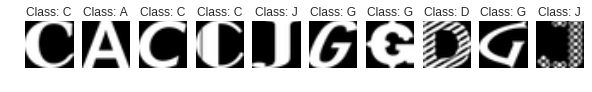

In [4]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

def class_to_char(cl):
    return chr(ord('A')+int(cl))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:], cmap="gray")
    plt.title('Class: '+class_to_char(y_train[i]))
    print('Training sample',i,': class:',class_to_char(y_train[i]), ', one-hot encoded:', Y_train[i])

In the code above, the function `class_to_char` is just to convert the integer class index to the corresponding character, e.g., 0="A", 1="B", and so on.

### Activation functions

Let's start by plotting some common activation functions for neural networks.

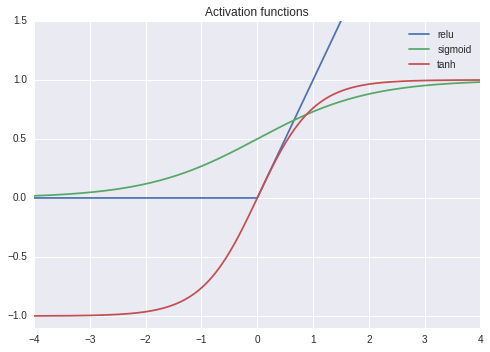

In [5]:
x = np.arange(-4,4,.01)
plt.figure()
plt.plot(x, np.maximum(x,0), label='relu')
plt.plot(x, 1/(1+np.exp(-x)), label='sigmoid')
plt.plot(x, np.tanh(x), label='tanh')
plt.axis([-4, 4, -1.1, 1.5])
plt.title('Activation functions')
l = plt.legend()

### Initialization

Let's now create an MLP model that has multiple layers, non-linear activation functions (see above), and dropout layers. 

**Here is where you should add some code of your own!**

Activation functions can be added to the model in `model` using the [`Activation()` function](https://keras.io/layers/core/#activation), and dropout regularization using the [`Dropout()` function](https://keras.io/layers/core/#dropout). The first layer needs to specify the input dimension by giving the parameter `input_dim=28*28`.

The output of the last layer needs to be a probability distribution over the 10 classes to match the groundtruth (`Y_train`), i.e., a 10-dimensional vector that sums up to 1.0.

In [80]:
# Model initialization:
model = Sequential()

# *** Add your code here ***

# As an example, here's just a simple layer with 10 hidden nodes and no activation function,
#i.e., there is no non-linearity) - but you should change this!
model.add(Dense(10, input_dim=28*28))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(40, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_58 (Dense)             (None, 100)               1100      
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 40)                4040      
_________________________________________________________________
dense_60 (Dense)             (None, 10)                410       
Total params: 13,400
Trainable params: 13,400
Non-trainable params: 0
_________________________________________________________________
None


You can also visualise the model like this:

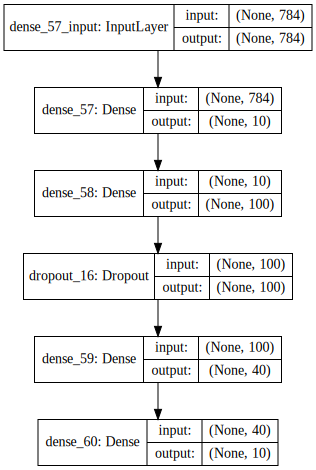

In [83]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Learning

Now we are ready to train our model.  An *epoch* means one pass through the training data. The `reshape()` function flattens our 28x28 images into vectors of length 784.  This means we are not using any information about the spatial neighborhood relations of the pixels.

You can run code below multiple times and it will continue the training process from where it left off.  If you want to start from scratch, re-initialize the model using the code above.

In [81]:
epochs = 10 # one epoch typically takes a few seconds

history = model.fit(X_train.reshape((-1,28*28)), 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=32,
                    verbose=2)

Epoch 1/10
0s - loss: 0.8622 - acc: 0.7590
Epoch 2/10
0s - loss: 0.4342 - acc: 0.8837
Epoch 3/10
0s - loss: 0.3805 - acc: 0.8944
Epoch 4/10
0s - loss: 0.3457 - acc: 0.9017
Epoch 5/10
0s - loss: 0.3220 - acc: 0.9067
Epoch 6/10
0s - loss: 0.3033 - acc: 0.9115
Epoch 7/10
0s - loss: 0.2929 - acc: 0.9155
Epoch 8/10
0s - loss: 0.2810 - acc: 0.9170
Epoch 9/10
0s - loss: 0.2696 - acc: 0.9194
Epoch 10/10
0s - loss: 0.2637 - acc: 0.9225


Now let's see how the training progressed by plotting the loss and accuracy over time.

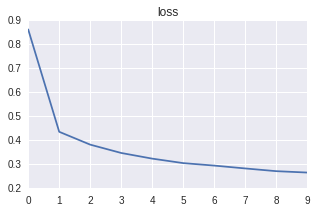

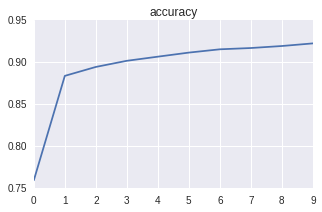

In [84]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

### Inference

Now, let's see how well the model can generalize to data it hasn't seen before, i.e., the test data. You should try to have at least an accuracy above 90%.

In [82]:
scores = model.evaluate(X_test.reshape((-1,28*28)), Y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 90.39%


We can also inspect the results in more detail.  Let's see some test characters that the model got wrong.

Wrong predictions: 358
Showing 10 first failures.  The predicted class is shown first and the correct class in parenthesis.


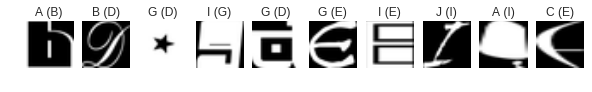

In [85]:
predictions = model.predict(X_test.reshape((-1,28*28)))
rounded = np.argmax(predictions, axis=1)
errors = rounded != y_test
nerrors = np.count_nonzero(errors)
print('Wrong predictions:', nerrors)

maxtoshow = 10
print('Showing', maxtoshow, 'first failures.  The predicted class is shown first and the correct class in parenthesis.')
ii = 0
plt.figure(figsize=(maxtoshow*pltsize, pltsize))
for i in range(X_test.shape[0]):
    if ii>=maxtoshow:
        break
    if errors[i]:
        plt.subplot(1, maxtoshow, ii+1)
        plt.axis('off')
        plt.imshow(X_test[i,:,:], cmap="gray")
        plt.title("%s (%s)" % (class_to_char(rounded[i]), class_to_char(y_test[i])))
        ii = ii + 1

## Model tuning

Try to modify the MLP model so that you get at least an accuracy above 90% in the test dataset.

You can also consult the Keras documentation at https://keras.io/.  For example, the Dense, Activation, and Dropout layers are described at https://keras.io/layers/core/.